<a href="https://colab.research.google.com/github/ASO1801040/AI_tech2020/blob/master/2020AI030A_family_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import matplotlib.pyplot as plt
import cv2
import urllib.request as req
from google.colab.patches import cv2_imshow

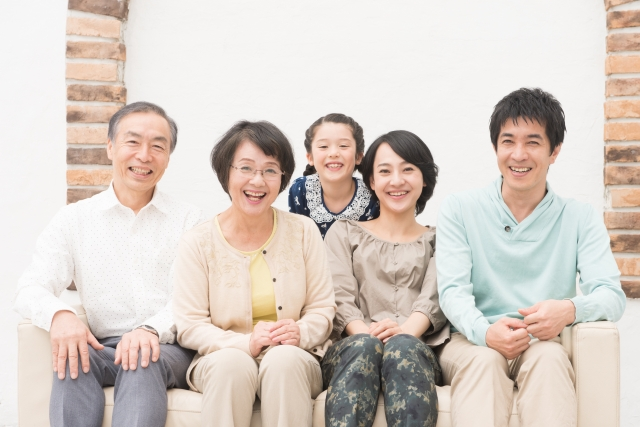

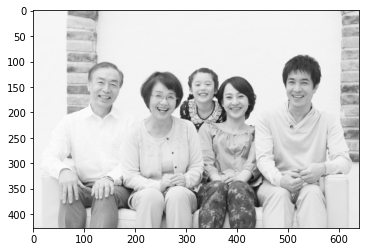

In [66]:
url = "https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
savefile = "family.png"
req.urlretrieve(url,savefile)
img = cv2.imread(savefile)
cv2_imshow(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

In [67]:
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml"
cascade_file = "cascade_file.xml"

req.urlretrieve(url, cascade_file)
cascade = cv2.CascadeClassifier(cascade_file)

In [68]:
face_list = cascade.detectMultiScale(img_gray, minSize=(50, 50))
if len(face_list) == 0:
  print("検出数は0でした")
else:
  print( "検出数は", len(face_list), "件" )

検出数は 5 件


顔の座標: x= 487  y= 117 横幅W= 66  縦幅H= 66
顔の座標: x= 112  y= 118 横幅W= 67  縦幅H= 67
顔の座標: x= 304  y= 122 横幅W= 58  縦幅H= 58
顔の座標: x= 226  y= 146 横幅W= 62  縦幅H= 62
顔の座標: x= 367  y= 148 横幅W= 59  縦幅H= 59


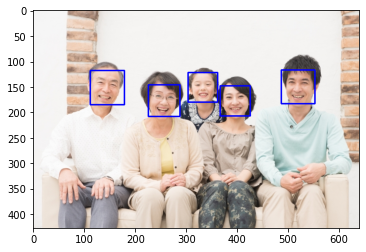

In [69]:
for (x, y, w, h) in face_list:
  print("顔の座標: x=", x, " y=", y, "横幅W=", w, " 縦幅H=", h)
  blue = ( 255, 0, 0)  
  cv2.rectangle( img, (x,y), (x+w, y+h), blue, thickness=2 )
plt.imshow( cv2.cvtColor( img, cv2.COLOR_BGR2RGB ) )
plt.show()

In [70]:
# モザイク用の関数
def mosaic( img, rect, size ):
  
  (x1, y1, x2, y2) = rect 
  w = x2 - x1 
  h = y2 - y1 
  i_rect = img[ y1:y2, x1:x2 ]
  i_small = cv2.resize( i_rect, ( size, size ) )
  i_mos = cv2.resize( i_small, (w, h), interpolation=cv2.INTER_AREA )
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos
  return img2 

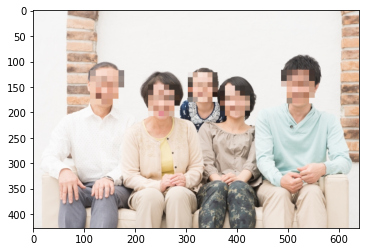

In [71]:
img = cv2.imread(savefile)
for (x, y, w, h) in face_list:
  img = mosaic( img, (x, y, w+x, h+y), 6)
cv2.imwrite("img-mosaic.png", img)
plt.imshow( cv2.cvtColor( img, cv2.COLOR_BGR2RGB ) )
plt.show()